## **Лабораторная работа №5**

### **Определение бизнес-цели для решения задачи кластеризации**

**Вариант задания:** Набор данных о ценах на акции Starbucks.

**Бизнес-цель:** Идентификация временных периодов с похожими рыночными условиями на основе исторических данных о ценах акций.

**Постановка задачи:** Группировка временных периодов (например, дней) на основе схожих характеристик рыночной активности.
 
**Столбцы датасета и их пояснение:**

**Date** - Дата, на которую относятся данные. Эта характеристика указывает конкретный день, в который происходила торговля акциями Starbucks.

**Open** - Цена открытия. Стоимость акций Starbucks в начале торгового дня. Это важный показатель, который показывает, по какой цене начались торги в конкретный день, и часто используется для сравнения с ценой закрытия для определения дневного тренда.

**High** - Максимальная цена за день. Наибольшая цена, достигнутая акциями Starbucks в течение торгового дня. Эта характеристика указывает, какой была самая высокая стоимость акций за день.

**Low** - Минимальная цена за день. Наименьшая цена, по которой торговались акции Starbucks в течение дня.

**Close** - Цена закрытия. Стоимость акций Starbucks в конце торгового дня. Цена закрытия — один из основных показателей, используемых для анализа акций, так как она отображает итоговую стоимость акций за день и часто используется для расчета дневных изменений и трендов на длительных временных периодах.

**Adj Close** - Скорректированная цена закрытия. Цена закрытия, скорректированная с учетом всех корпоративных действий.

**Volume** - Объем торгов. Количество акций Starbucks, проданных и купленных в течение дня. 

### **Загрузка данных датасета и подключим необходимые библиотеки для выполнения последующих задач**

На этом этапе подключаем библиотеки, необходимые для анализа данных, кластеризации и визуализации.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("..//static//csv//StarbucksDataset.csv")
df  

Date       Open       High        Low      Close  Adj Close  \
0     1992-06-26   0.328125   0.347656   0.320313   0.335938   0.260703   
1     1992-06-29   0.339844   0.367188   0.332031   0.359375   0.278891   
2     1992-06-30   0.367188   0.371094   0.343750   0.347656   0.269797   
3     1992-07-01   0.351563   0.359375   0.339844   0.355469   0.275860   
4     1992-07-02   0.359375   0.359375   0.347656   0.355469   0.275860   
...          ...        ...        ...        ...        ...        ...   
8031  2024-05-17  75.269997  78.000000  74.919998  77.849998  77.849998   
8032  2024-05-20  77.680000  78.320000  76.709999  77.540001  77.540001   
8033  2024-05-21  77.559998  78.220001  77.500000  77.720001  77.720001   
8034  2024-05-22  77.699997  81.019997  77.440002  80.720001  80.720001   
8035  2024-05-23  80.099998  80.699997  79.169998  79.260002  79.260002   

         Volume  
0     224358400  
1      58732800  
2      34777600  
3      18316800  
4      13996800  
...         ...  
8031   14436500  
8032   11183800  
8033    8916600  
8034   22063400  
8035    4651418  

[8036 rows x 7 columns]

### **Проведем предобработку данных**

In [6]:
# Загрузка и предобработка данных
data = pd.read_csv("..//static//csv//StarbucksDataset.csv")  # Замените на путь к вашему файлу
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Масштабируем числовые данные
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

### **Выполним понижение размерности с помощью PCA**

Используем метод анализа главных компонент (PCA) для сокращения размерности данных до двух измерений. Это позволяет визуализировать данные на плоскости и понять их структуру. Также построим график, показывающий расположение объектов в пространстве двух главных компонент.

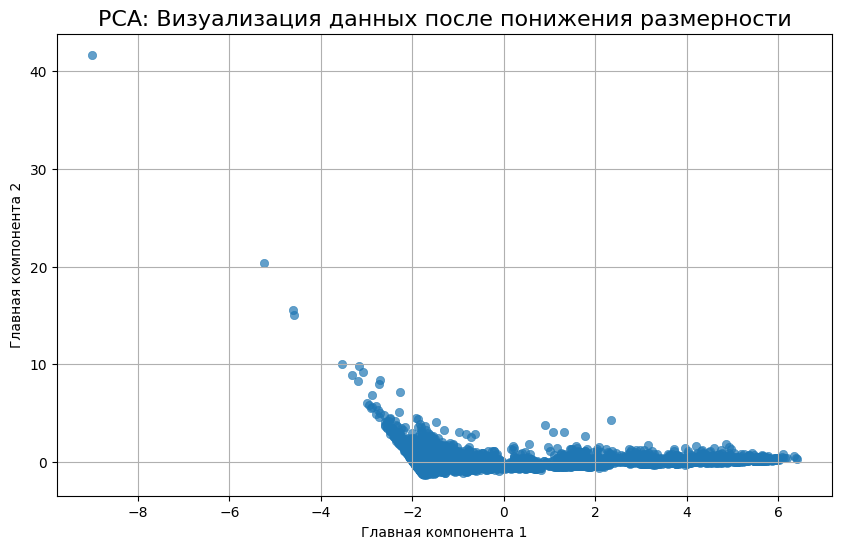

In [9]:
# Понижение размерности с помощью PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация данных после PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], alpha=0.7, edgecolor=None)
plt.title("PCA: Визуализация данных после понижения размерности", fontsize=16)
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid()
plt.show()

### **Определение количества кластеров**

Выполним определение используя два метода:

- **Метод локтя:** Строится график зависимости инерции от количества кластеров. Этот метод помогает определить оптимальное количество кластеров, при котором инерция перестаёт существенно снижаться.

- **Коэффициент силуэта:** Для каждого количества кластеров вычисляется средний коэффициент силуэта, который измеряет качество кластеризации. График помогает выбрать количество кластеров с максимальным значением силуэта.

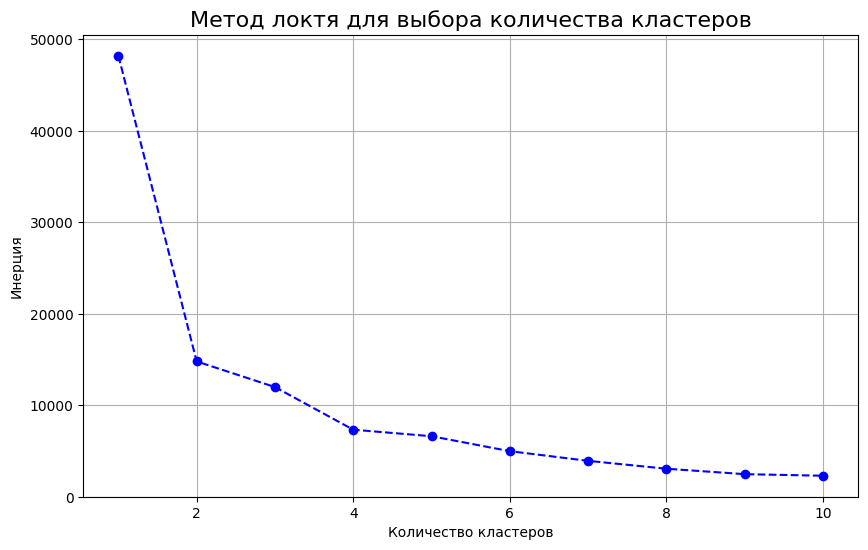

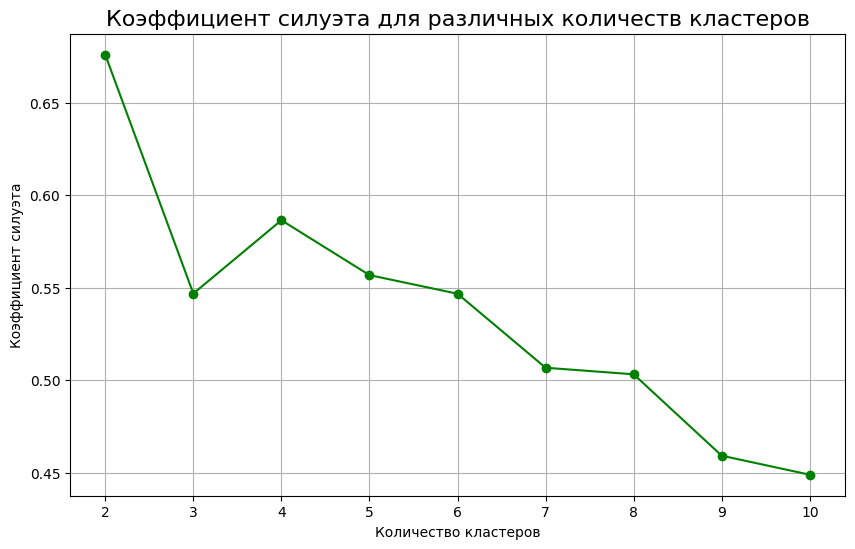

In [10]:
# Метод локтя
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', color='blue', linestyle='--')
plt.title("Метод локтя для выбора количества кластеров", fontsize=16)
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.grid()
plt.show()

# Коэффициент силуэта
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green', linestyle='-')
plt.title("Коэффициент силуэта для различных количеств кластеров", fontsize=16)
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.grid()
plt.show()

### **Кластеризация с помощью KMeans**

Выбранное количество кластеров применяем к данным с помощью алгоритма KMeans. Результаты кластеризации добавляются в исходные данные. Также построен график, визуализирующий кластеры через понижение размерности (PCA), с разным цветом для каждого кластера.

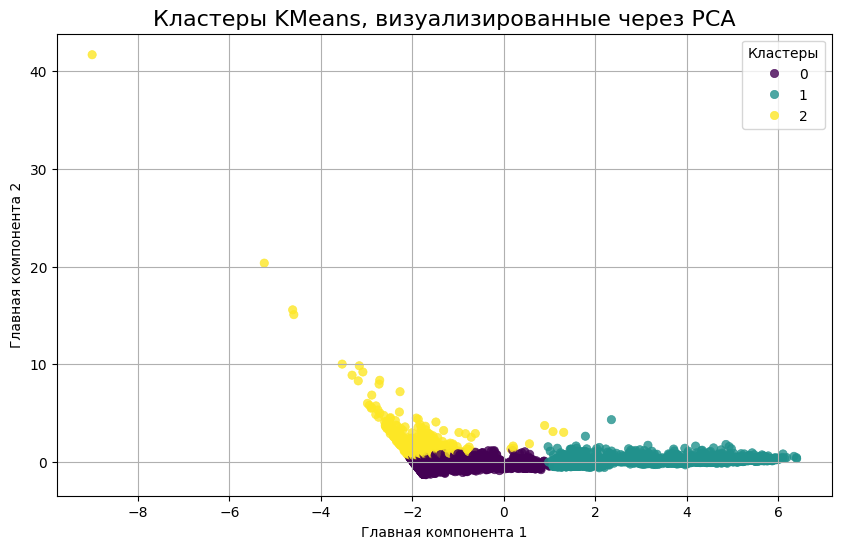

In [11]:
optimal_k = 3  # Замените на оптимальное количество кластеров, если известно
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans Cluster'] = kmeans.fit_predict(data_scaled)

# Визуализация кластеров KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['KMeans Cluster'], palette='viridis', alpha=0.8, edgecolor=None)
plt.title("Кластеры KMeans, визуализированные через PCA", fontsize=16)
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.legend(title='Кластеры')
plt.grid()
plt.show()


### **Иерархическая кластеризация**

Построим дендрограмму на основе агломеративной кластеризации с методом **ward**. Она показывает, как объекты объединяются в кластеры на различных уровнях. Затем применим алгоритм иерархической кластеризации для заданного количества кластеров где результаты добавляются в данные. В конце построим график, показывающий кластеры иерархической кластеризации через PCA.

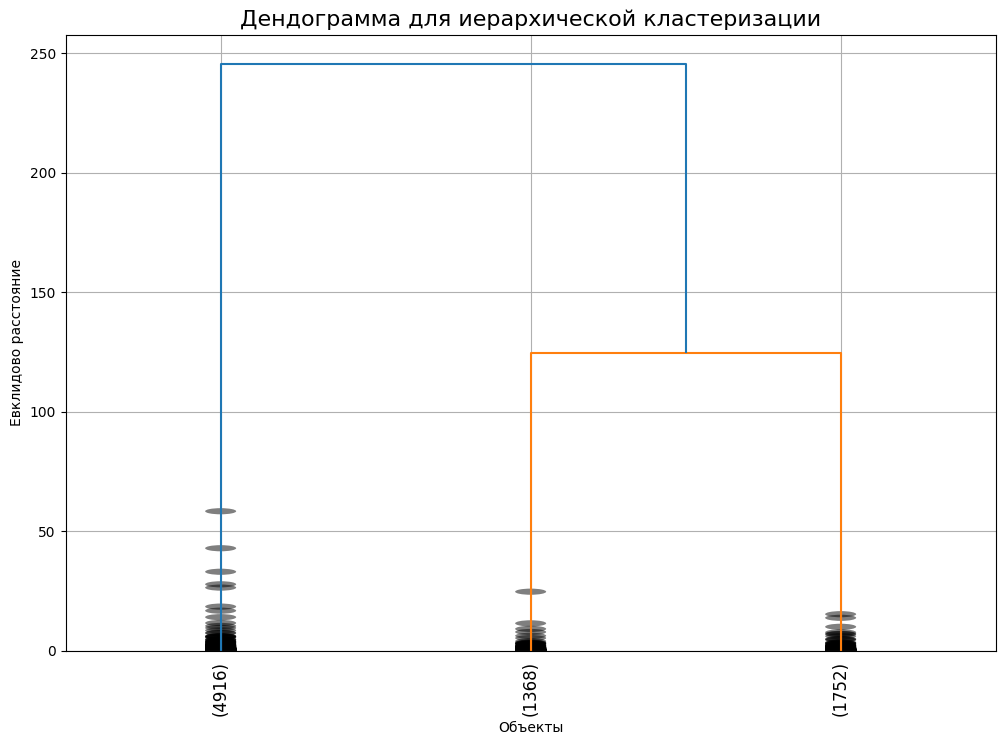

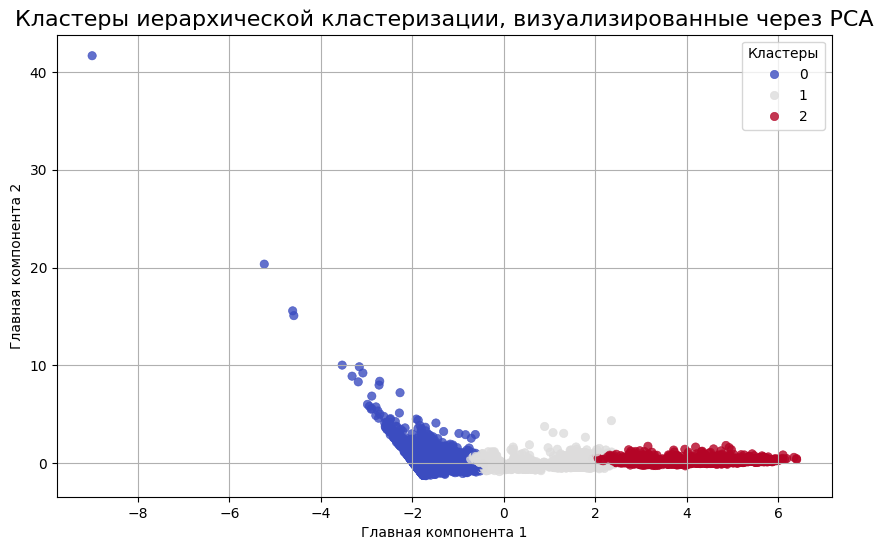

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering

Z = linkage(data_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=optimal_k, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Дендограмма для иерархической кластеризации", fontsize=16)
plt.xlabel("Объекты")
plt.ylabel("Евклидово расстояние")
plt.grid()
plt.show()

# Применение иерархической кластеризации
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
data['Hierarchical Cluster'] = hierarchical.fit_predict(data_scaled)

# Визуализация кластеров иерархической кластеризации
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Hierarchical Cluster'], palette='coolwarm', alpha=0.8, edgecolor=None)
plt.title("Кластеры иерархической кластеризации, визуализированные через PCA", fontsize=16)
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.legend(title='Кластеры')
plt.grid()
plt.show()

### **Оценка качества кластеризации**

Подводя итоги оцениваем качество кластеризации. Для этого были вычислены средние коэффициенты силуэта для:

- Кластеризации KMeans.

- Иерархической кластеризации.

Эти метрики показывают, насколько хорошо объекты внутри одного кластера схожи и насколько различаются между кластерами.

In [15]:
silhouette_kmeans = silhouette_score(data_scaled, data['KMeans Cluster'])
silhouette_hierarchical = silhouette_score(data_scaled, data['Hierarchical Cluster'])

print(f"Коэффициент силуэта для KMeans: {silhouette_kmeans:.4f}")
print(f"Коэффициент силуэта для иерархической кластеризации: {silhouette_hierarchical:.4f}")

Коэффициент силуэта для KMeans: 0.5469
Коэффициент силуэта для иерархической кластеризации: 0.5783
